# Acquire & Analyze
By Aspen Runkel for Applied Data Analytics due 12/11/19

This notebook performs some analysis on a historical dataset (acquired from [kaggle](https://www.kaggle.com/heesoo37/120-years-of-olympic-history-athletes-and-results/data)) on the modern Olympic Games, including all the Games from Athens 1896 to Rio 2016.

### About the data set:
This dataset came with 2 data sources: athlete_events.csv, noc_regions.csv.

1 - The file **athlete_events.csv** contains 271116 rows and 15 columns. Each row corresponds to an individual athlete competing in an individual Olympic event. The columns are:

* ID - Unique number for each athlete
* Name - Athlete's name
* Sex - M or F
* Age - Integer
* Height - In centimeters
* Weight - In kilograms
* Team - Team name
* NOC - National Olympic Committee 3-letter code
* Games - Year and season
* Year - Integer
* Season - Summer or Winter
* City - Host city
* Sport - Sport
* Event - Event
* Medal - Gold, Silver, Bronze, or NA

2 - The file **noc_regions.csv** contains 230 rows and 3 columns. This file allows us to join country name on NOC code. The columns are:
* NOC (National Olympic Committee 3 letter code)
* Country name
* Notes

### Imports

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

import os
print(os.listdir("../12.11_AcquireAnalyze/data"))

['noc_regions.csv', 'athlete_events.csv']


## Step 1: Import and View the Data

In [2]:
#import the data set
data = pd.read_csv('../12.11_AcquireAnalyze/data/athlete_events.csv')
regions = pd.read_csv('../12.11_AcquireAnalyze/data/noc_regions.csv')

In [3]:
#view the top 5 lines of the athlete_events data
data.head(5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [4]:
#describe function to collect statistical information
data.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


In [5]:
#and info funtion to specify datatypes, column names and other information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
ID        271116 non-null int64
Name      271116 non-null object
Sex       271116 non-null object
Age       261642 non-null float64
Height    210945 non-null float64
Weight    208241 non-null float64
Team      271116 non-null object
NOC       271116 non-null object
Games     271116 non-null object
Year      271116 non-null int64
Season    271116 non-null object
City      271116 non-null object
Sport     271116 non-null object
Event     271116 non-null object
Medal     39783 non-null object
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [6]:
#view the top 5 lines of the noc_regions data
regions.head(5)

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [7]:
#join the dataframes using the NOC collumn as the key
merged = pd.merge(data, regions, on='NOC', how='left')

In [8]:
#check to make sure it worked --> added "region" and "notes" collumns to end
merged.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


## Step 2: Start Analysis
### Medals Per Country

In [10]:
goldMedals = merged[(merged.Medal == 'Gold')]
goldMedals.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
42,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold,Finland,NaN
44,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Horse Vault,Gold,Finland,NaN
48,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Pommelled Horse,Gold,Finland,NaN
60,20,Kjetil Andr Aamodt,M,20.0,176.0,85.0,Norway,NOR,1992 Winter,1992,Winter,Albertville,Alpine Skiing,Alpine Skiing Men's Super G,Gold,Norway,NaN


In [11]:
#top 5 gold medal winning countries
goldMedals.region.value_counts().reset_index(name='Medal').head(5)

,index,Medal
0,USA,2638
1,Russia,1599
2,Germany,1301
3,UK,678
4,Italy,575


Text(0.5, 1, 'Medals per Country')

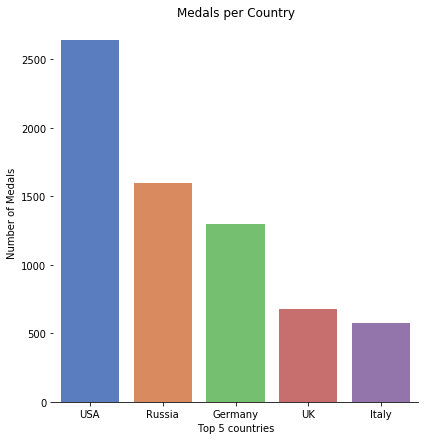

In [12]:
#plot of top 5 gold medal countries
totalGoldMedals = goldMedals.region.value_counts().reset_index(name='Medal').head(5)
g = sns.catplot(x="index", y="Medal", data=totalGoldMedals,
                height=6, kind="bar", palette="muted")
g.despine(left=True)
g.set_xlabels("Top 5 countries")
g.set_ylabels("Number of Medals")
plt.title('Medals per Country')

***USA! USA! USA!***
### The Sports that the USA has won most Gold Medals in

In [13]:
#dataframe including gold medals for only the USA
goldMedalsUSA = goldMedals.loc[goldMedals['NOC'] == 'USA']

In [14]:
#count medals per sport
goldMedalsUSA.Event.value_counts().reset_index(name='Medal').head(20)

,index,Medal
0,Basketball Men's Basketball,186
1,Swimming Men's 4 x 200 metres Freestyle Relay,111
2,Rowing Men's Coxed Eights,108
3,Swimming Men's 4 x 100 metres Medley Relay,108
4,Basketball Women's Basketball,95
5,Athletics Men's 4 x 400 metres Relay,81
6,Swimming Women's 4 x 100 metres Medley Relay,79
7,Swimming Women's 4 x 100 metres Freestyle Relay,78
8,Football Women's Football,66
9,Athletics Men's 4 x 100 metres Relay,63


Not surprisingly, team sports rank at the top considering that each individual on the team earns a medal and is included in the overall count.

### Distribution of gold medalists by age

In [15]:
#dataframe including only gold medalists
goldMedals = merged[(merged.Medal == 'Gold')]
goldMedals.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
42,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold,Finland,NaN
44,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Horse Vault,Gold,Finland,NaN
48,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Pommelled Horse,Gold,Finland,NaN
60,20,Kjetil Andr Aamodt,M,20.0,176.0,85.0,Norway,NOR,1992 Winter,1992,Winter,Albertville,Alpine Skiing,Alpine Skiing Men's Super G,Gold,Norway,NaN


In [16]:
#excludes ages that are "NaN" values
goldMedals = goldMedals[np.isfinite(goldMedals['Age'])]

Text(0.5, 1.0, 'Distribution of Gold Medals')

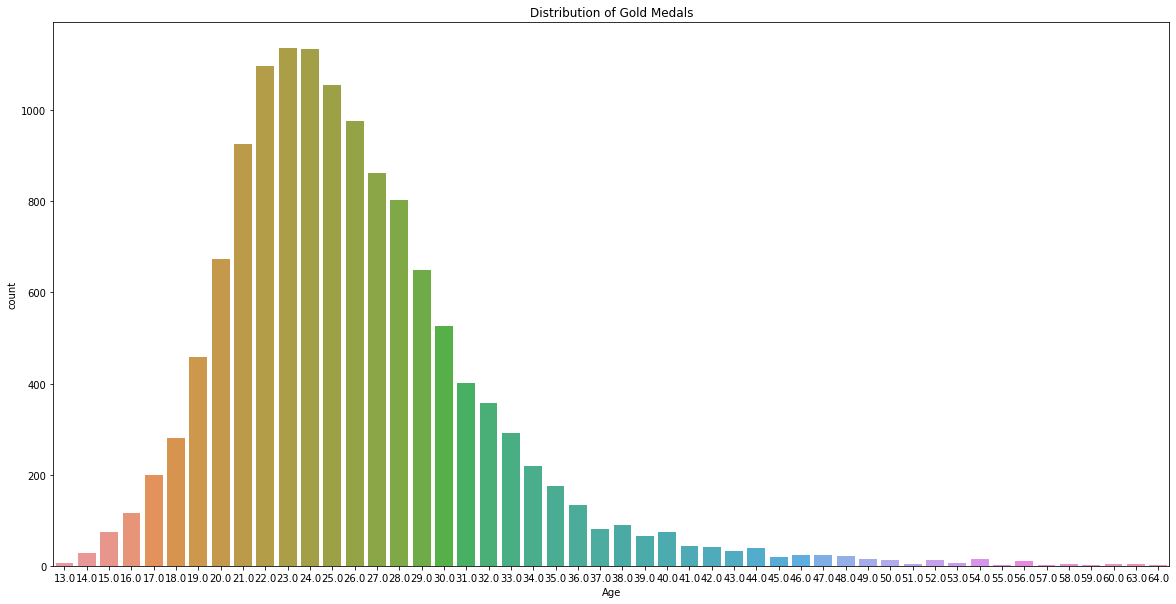

In [17]:
#creates plot to show distribution of gold medalist by age
plt.figure(figsize=(20, 10))
plt.tight_layout()
sns.countplot(goldMedals['Age'])
plt.title('Distribution of Gold Medals')

### Distribution of Female Athletes Over Time
***Winter & Summer Games***

In [18]:
#dataframe including only women
women = merged[(merged.Sex == 'F')]
women.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN
5,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",NaN,Netherlands,NaN
6,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN
7,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,"Speed Skating Women's 1,000 metres",NaN,Netherlands,NaN
8,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


Text(0.5, 1.0, 'Women medals per edition of the Games')

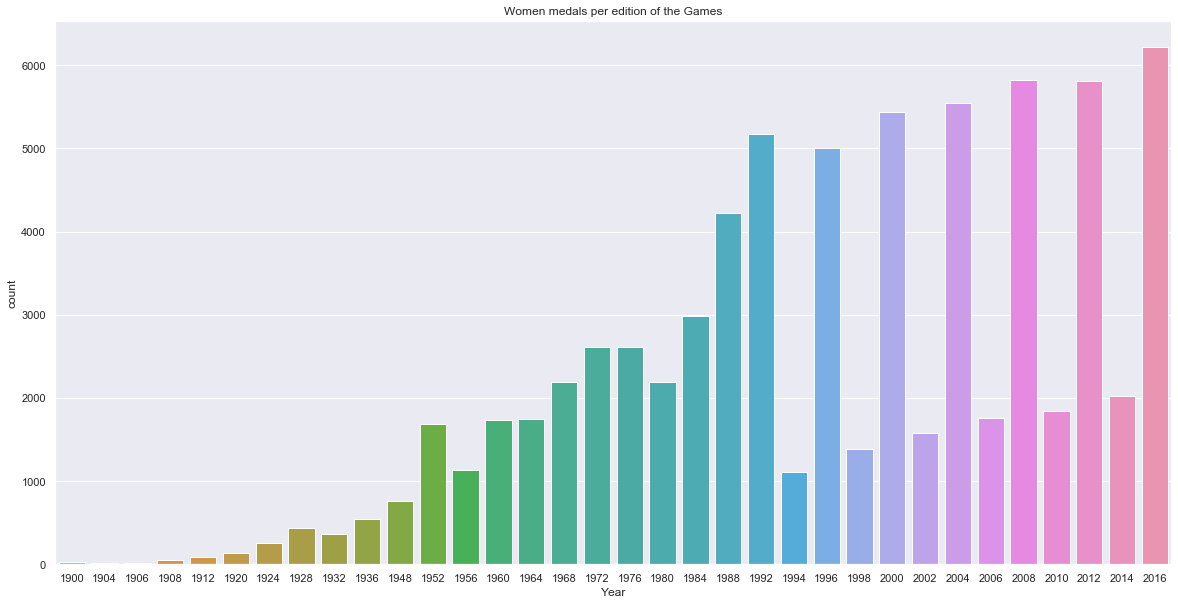

In [19]:
#plot number of medals by women per edition of the games
sns.set(style="darkgrid")
plt.figure(figsize=(20, 10))
sns.countplot(x='Year', data=women)
plt.title('Women medals per edition of the Games')

Hmm... why are there extreme drops starting in 1994? WELL the Winter and Summer Games were held in the same year up until 1992. After that, they staggered them such that Winter Games occur on a four year cycle starting with 1994, then Summer in 1996, etc. FAR less women participated in the winter games than the summer games.

Let's narrow this down to just the ***summer games***.

In [20]:
#dataframe including only women who competed in the SUMMER
women = merged[(merged.Sex == 'F') & (merged.Season == 'Summer')]
women.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
26,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN,Netherlands,NaN
27,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 4 x 100 metres Relay,NaN,Netherlands,NaN
32,13,Minna Maarit Aalto,F,30.0,159.0,55.5,Finland,FIN,1996 Summer,1996,Summer,Atlanta,Sailing,Sailing Women's Windsurfer,NaN,Finland,NaN
33,13,Minna Maarit Aalto,F,34.0,159.0,55.5,Finland,FIN,2000 Summer,2000,Summer,Sydney,Sailing,Sailing Women's Windsurfer,NaN,Finland,NaN
79,21,Ragnhild Margrethe Aamodt,F,27.0,163.0,NaN,Norway,NOR,2008 Summer,2008,Summer,Beijing,Handball,Handball Women's Handball,Gold,Norway,NaN


Text(0.5, 1.0, 'Women medals per edition of the Games')

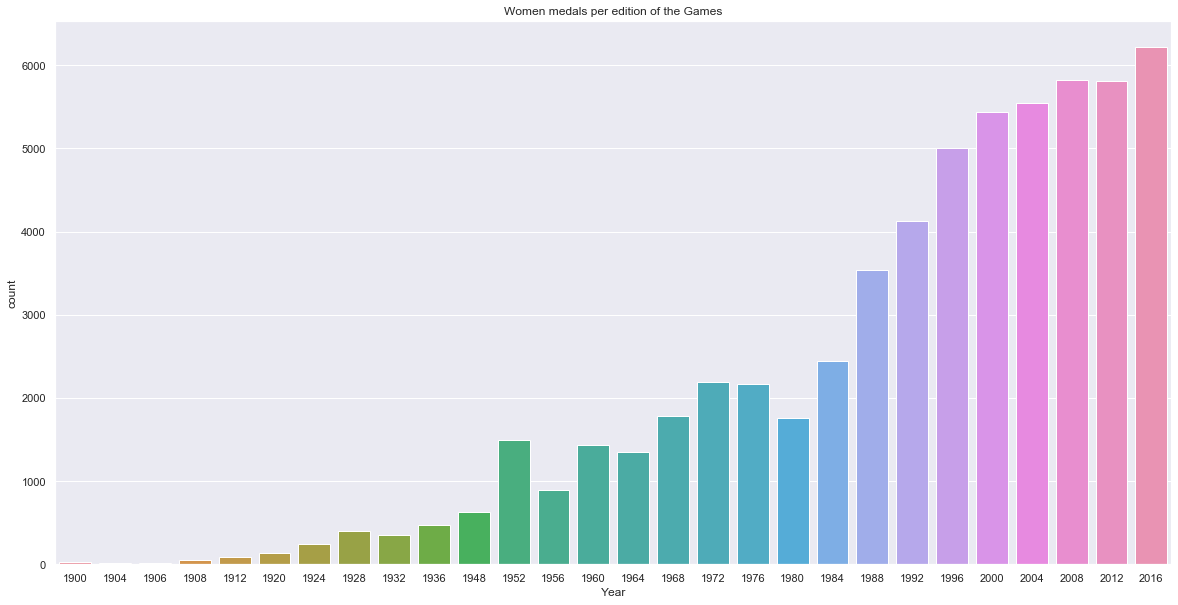

In [21]:
#plot number of medals by women per edition of the SUMMER games
sns.set(style="darkgrid")
plt.figure(figsize=(20, 10))
sns.countplot(x='Year', data=women)
plt.title('Women medals per edition of the Games')

### Distribution of Male Athletes Over Time
***Summer Games***

In [22]:
#dataframe including only men who competed in the SUMMER
men = merged[(merged.Sex == 'M') & (merged.Season == 'Summer')]
men.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
29,10,"Einar Ferdinand ""Einari"" Aalto",M,26.0,NaN,NaN,Finland,FIN,1952 Summer,1952,Summer,Helsinki,Swimming,Swimming Men's 400 metres Freestyle,NaN,Finland,NaN


Text(0.5, 1.0, 'Men medals per edition of the Games')

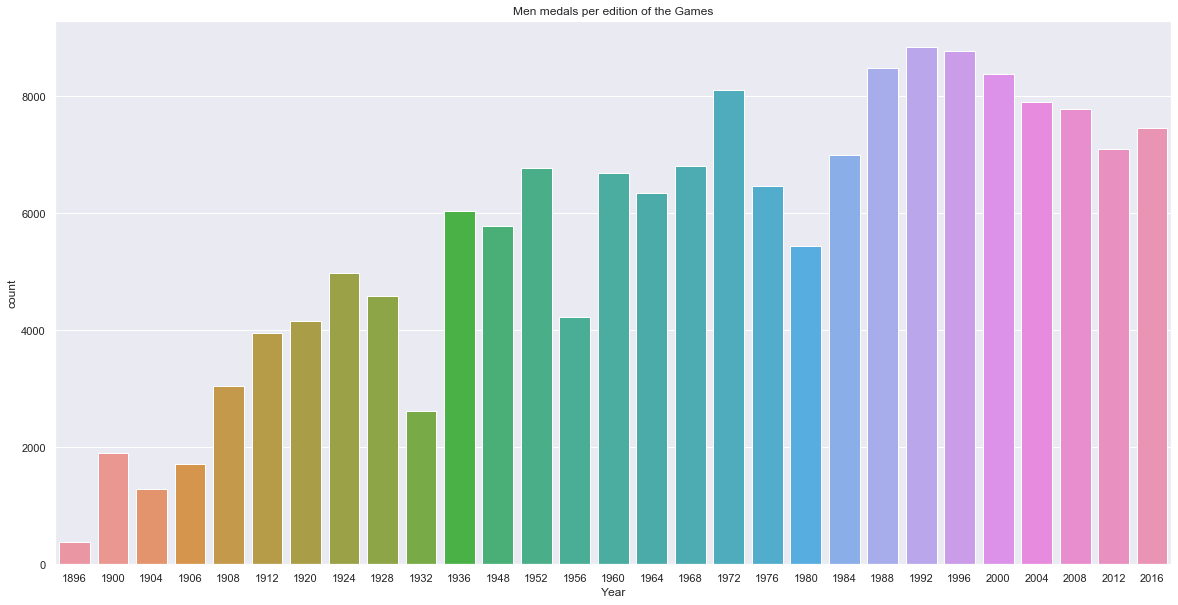

In [23]:
#plot number of medals by men per edition of the SUMMER games
sns.set(style="darkgrid")
plt.figure(figsize=(20, 10))
sns.countplot(x='Year', data=men)
plt.title('Men medals per edition of the Games')

### END